In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df_house = pd.read_csv('kc_house_data.csv')

In [4]:
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffc4c70f588>,
      dtype=object)

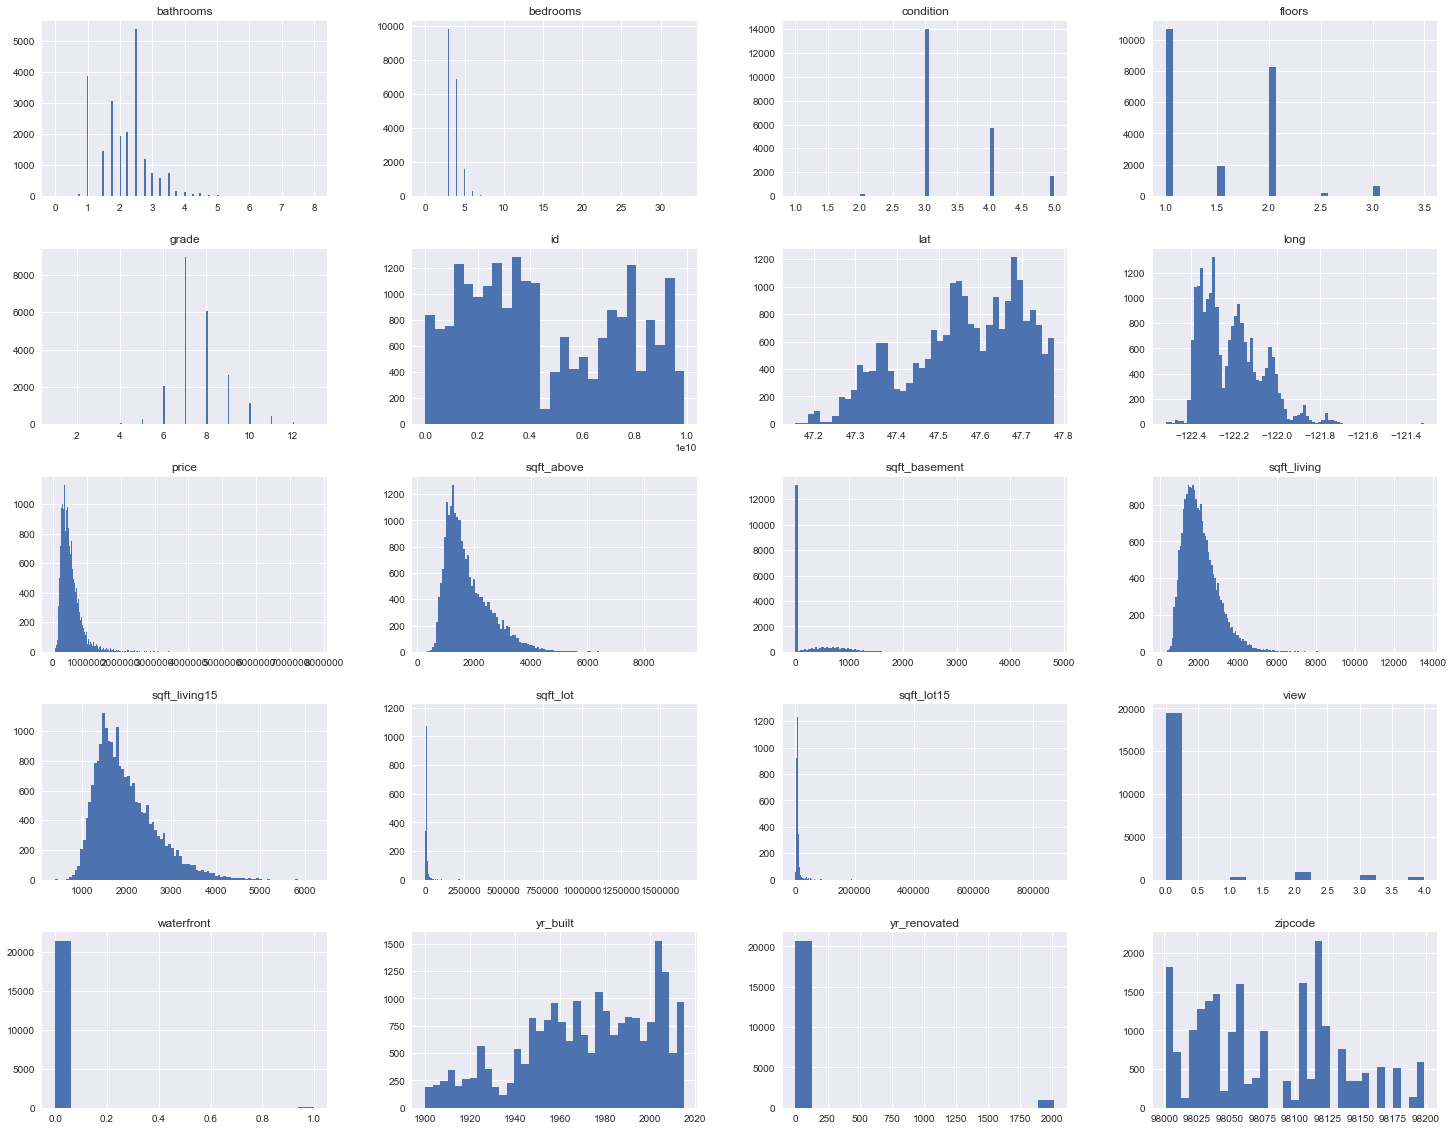

In [46]:
df_house.hist(figsize=(25,20), bins='auto')

In [9]:
columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
           'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
           'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [10]:
all_data = df_house[columns]

In [14]:
X = all_data.drop(['price'], axis=1)
y = all_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lm = linear_model.LinearRegression() 

model = lm.fit(X_train[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
                       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']], y_train)

lm = sm.OLS(y_train, X_train)
model_all = lm.fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2361.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:33:01   Log-Likelihood:            -2.3543e+05
No. Observations:               17290   AIC:                         4.709e+05
Df Residuals:                   17272   BIC:                         4.710e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -1.307e-06   5.32e-07     -2.456      0.014   -2.35e-06   -2.64e-07
bedrooms      -3.405e+04   2079.721    -16.371      0.000   -3.81e+04      -3e+04
bathrooms       4.45e+04   3607.657     12.334      0.000    3.74e+04    5.16e+04
sqft_living     108.7783      2.530     43.002      0.000     103.820     113.737
sqft_lot          0.0865      0.058      1.495      0.135      -0.027       0.200
floors         5528.2263   3896.712      1.419      0.156   -2109.725    1.32e+04
waterfront     5.625e+05   1.95e+04     28.831      0.000    5.24e+05    6.01e+05
view           5.326e+04   2346.748     22.694      0.000    4.87e+04    5.79e+04
condition      2.521e+04   2560.508      9.848      0.000    2.02e+04    3.02e+04
grade          9.426e+04   2363.737     39.876      0.000    8.96e+04    9.89e+04
sqft_above       70.5935      2.468     28.600      0.000      65.755      75.432
sqft_basement    38.1848      2.915     13.101      0.000      32.472      43.898
yr_built      -2622.2225     75.143    -34.896      0.000   -2769.510   -2474.934
yr_renovated     20.8861      4.051      5.156      0.000      12.946      28.826
zipcode        -486.9280     19.824    -24.562      0.000    -525.785    -448.071
lat            5.949e+05   1.19e+04     50.135      0.000    5.72e+05    6.18e+05
long           -1.96e+05   1.45e+04    -13.488      0.000   -2.25e+05   -1.68e+05
sqft_living15    22.6219      3.747      6.038      0.000      15.278      29.966
sqft_lot15       -0.3330      0.082     -4.064      0.000      -0.494      -0.172
==============================================================================
Omnibus:                    15013.753   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1728730.089
Skew:                           3.646   Prob(JB):                         0.00
Kurtosis:                      51.440   Cond. No.                     3.53e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

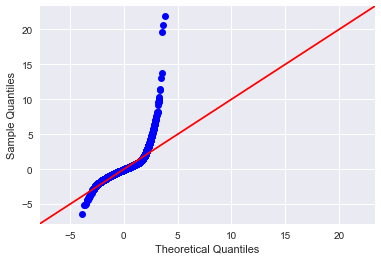

In [15]:
fig = sm.graphics.qqplot(model_all.resid, dist=stats.norm, line='45', fit=True)

In [56]:
print('Model Accuracy:', model.score(X_test,y_test))
print('MSE for train set:', np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print('MSE for test set:', np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print('Cross Validation:', cross_val_score(model, X_train, y_train, cv = 100, scoring = "r2").mean())

Model Accuracy: 0.6541020314679737
MSE for train set: 212789.37425322627
MSE for test set: 228673.8237293402
Cross Validation: 0.6404809370393123


In [20]:

neededCols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
            'yr_renovated', 'sqft_living15', 'sqft_lot15']

In [21]:
regression_data = df_house[neededCols]
regression_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [51]:
X_1 = regression_data.drop(['price'], axis=1)
y_1 = regression_data['price']

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.20, random_state=42)

lm = linear_model.LinearRegression() 

model_regression_data = lm.fit(X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                        'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
                        'sqft_lot15']], y_train)

lm = sm.OLS(y_train, X_train)
model_regression_data = lm.fit()
model_regression_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              9177.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:48:12   Log-Likelihood:                     -2.3746e+05
No. Observations:               17290   AIC:                                  4.750e+05
Df Residuals:                   17276   BIC:                                  4.751e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.968e+04   2326.284    -12.760      0.000   -3.42e+04   -2.51e+04
bathrooms     -7995.0735   3791.798     -2.109      0.035   -1.54e+04    -562.766
sqft_living     122.6055      2.821     43.458      0.000     117.076     128.135
sqft_lot         -0.0039      0.065     -0.060      0.952      -0.131       0.123
floors         4450.1758   4317.126      1.031      0.303   -4011.828    1.29e+04
waterfront     5.517e+05   2.19e+04     25.144      0.000    5.09e+05    5.95e+05
view           5.495e+04   2608.649     21.064      0.000    4.98e+04    6.01e+04
condition      5.825e+04   2686.665     21.680      0.000     5.3e+04    6.35e+04
grade          1.107e+05   2587.049     42.806      0.000    1.06e+05    1.16e+05
sqft_above       46.7345      2.718     17.196      0.000      41.408      52.062
sqft_basement    75.8710      3.201     23.701      0.000      69.596      82.146
yr_built       -409.1591      9.695    -42.203      0.000    -428.162    -390.156
yr_renovated     69.4426      4.307     16.123      0.000      61.000      77.885
sqft_living15    16.9298      4.158      4.072      0.000       8.780      25.079
sqft_lot15       -0.6247      0.092     -6.812      0.000      -0.804      -0.445
==============================================================================
Omnibus:                    13006.793   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           954079.011
Skew:                           3.004   Prob(JB):                         0.00
Kurtosis:                      38.892   Cond. No.                     4.05e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

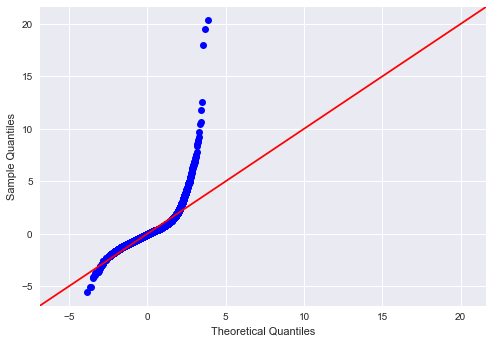

In [47]:
fig = sm.graphics.qqplot(model_regression_data.resid, dist=stats.norm, line='45', fit=True)

In [55]:
print('Model Accuracy:', model.score(X_1_test,y_1_test))
print('MSE for train set:', np.sqrt(mean_squared_error(y_1_train, model.predict(X_1_train))))
print('MSE for test set:', np.sqrt(mean_squared_error(y_1_test, model.predict(X_1_test))))
print('Cross Validation:', cross_val_score(model, X_1_train, y_1_train, cv = 10, scoring = "r2").mean())

Model Accuracy: 0.6541020314679737
MSE for train set: 212789.37425322627
MSE for test set: 228673.8237293402
Cross Validation: 0.6523987322183349


In [30]:
train, test = train_test_split(df_house, test_size=0.2)


In [31]:
train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1724,1066600045,20140904T000000,350000.0,3,1.00,1240,10800,1.0,0,0,...,7,1240,0,1959,0,98056,47.5233,-122.185,1810,10800
1558,7214700160,20140509T000000,610000.0,3,3.00,2480,45302,1.0,0,0,...,8,1620,860,1976,0,98077,47.7591,-122.073,1260,14100
7578,4141010110,20140808T000000,1700000.0,4,3.50,4330,15335,2.0,0,0,...,11,3230,1100,1988,0,98040,47.5315,-122.231,3840,14311
17352,3336000170,20141003T000000,335000.0,4,1.00,1480,6500,1.5,0,0,...,7,1480,0,1914,0,98118,47.5282,-122.267,2380,6000
20761,6192410550,20140528T000000,739000.0,3,2.50,2810,5400,2.0,0,0,...,9,2810,0,2005,0,98052,47.7065,-122.118,2870,5400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2024079035,20140605T000000,685000.0,3,2.75,3150,219978,2.0,0,0,...,9,3000,150,1990,0,98024,47.5530,-121.946,3180,218235
600,8682250350,20141009T000000,507000.0,2,1.75,1670,6460,1.0,0,0,...,8,1670,0,2004,0,98053,47.7123,-122.027,2170,6254
4133,4036800805,20140513T000000,523000.0,3,1.50,1240,7735,1.0,0,0,...,7,1240,0,1957,0,98008,47.6010,-122.122,1260,7500
7542,5332200515,20150209T000000,1050000.0,3,1.75,2650,5512,2.0,0,0,...,9,2250,400,1984,0,98112,47.6265,-122.295,1440,5100


In [32]:
test

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20812,255450390,20140707T000000,351999.0,3,2.50,2370,4200,2.0,0,0,...,8,2370,0,2014,0,98038,47.3706,-122.017,2370,4200
2336,2333230270,20140814T000000,328000.0,4,2.50,1990,3980,2.0,0,0,...,7,1990,0,2002,0,98058,47.4445,-122.170,1990,4373
4617,4022900569,20141017T000000,405000.0,3,1.75,1900,10454,1.0,0,0,...,7,1390,510,1978,0,98155,47.7748,-122.291,2000,12000
2675,8700120270,20141210T000000,278000.0,4,2.50,1850,6037,2.0,0,0,...,7,1850,0,1991,0,98030,47.3590,-122.191,1860,6037
12660,4440900040,20140505T000000,379950.0,4,1.75,1970,9389,1.0,0,0,...,7,1140,830,1960,0,98133,47.7771,-122.339,1820,8135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11664,9558800030,20141107T000000,255000.0,2,2.00,1140,8400,1.0,0,0,...,7,1140,0,1954,0,98148,47.4351,-122.335,1130,9375
14997,5569620050,20140721T000000,731688.0,4,3.00,2630,5772,2.0,0,0,...,9,2630,0,2006,0,98052,47.6952,-122.133,3460,6158
3260,9842300485,20150311T000000,380000.0,2,1.00,1040,7372,1.0,0,0,...,7,840,200,1939,0,98126,47.5285,-122.378,1930,5150
20614,6149700197,20141106T000000,308625.0,2,2.00,1500,1408,3.0,0,0,...,7,1500,0,1999,0,98133,47.7293,-122.343,1500,1245


In [42]:
X = regression_data.drop(['price'], axis=1)
y = regression_data['price']


lm = linear_model.LinearRegression() 

model = lm.fit(X[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                        'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
                        'sqft_lot15']], y)

lm = sm.OLS(y, X)
model1 = lm.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                          1.136e+04
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:26:55   Log-Likelihood:                     -2.9710e+05
No. Observations:               21613   AIC:                                  5.942e+05
Df Residuals:                   21599   BIC:                                  5.943e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.118e+04   2109.923    -14.779      0.000   -3.53e+04    -2.7e+04
bathrooms     -1.016e+04   3409.105     -2.980      0.003   -1.68e+04   -3476.163
sqft_living     123.5396      2.523     48.960      0.000     118.594     128.485
sqft_lot          0.0328      0.054      0.611      0.541      -0.072       0.138
floors         4323.3325   3920.035      1.103      0.270   -3360.226     1.2e+04
waterfront       5.7e+05   1.95e+04     29.260      0.000    5.32e+05    6.08e+05
view           5.395e+04   2362.951     22.833      0.000    4.93e+04    5.86e+04
condition      6.022e+04   2430.517     24.778      0.000    5.55e+04     6.5e+04
grade          1.125e+05   2345.005     47.972      0.000    1.08e+05    1.17e+05
sqft_above       47.7016      2.461     19.382      0.000      42.878      52.526
sqft_basement    75.8380      2.877     26.358      0.000      70.199      81.478
yr_built       -415.4772      8.784    -47.301      0.000    -432.694    -398.261
yr_renovated     67.0157      3.870     17.318      0.000      59.431      74.601
sqft_living15    16.8069      3.759      4.471      0.000       9.439      24.174
sqft_lot15       -0.7131      0.082     -8.715      0.000      -0.873      -0.553
==============================================================================
Omnibus:                    15943.889   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1042359.898
Skew:                           2.952   Prob(JB):                         0.00
Kurtosis:                      36.506   Cond. No.                     2.32e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
print('Model Accuracy:', model.score(X, y))
print('MSE for train set:', np.sqrt(mean_squared_error(y, model.predict(X))))
print('MSE for test set:', np.sqrt(mean_squared_error(y, model.predict(X))))
print('Cross Validation:', cross_val_score(model, X, y, cv = 5, scoring = "r2").mean())

Model Accuracy: 0.6536335973255556
MSE for train set: 216060.00913869013
MSE for test set: 216060.00913869013
Cross Validation: 0.6468201186632571
